In [108]:
import requests as rq 
import pandas as pd

import csv 
from datetime import datetime, timedelta

In [109]:
import requests as rq
from datetime import datetime, timedelta

weather = []
start_date = datetime(2023, 10, 16)  # Bắt đầu từ ngày hiện tại
end_date = datetime(2024, 10, 16)  # Dự báo cho 14 ngày tới (tối đa với API miễn phí)
current_date = start_date

while current_date < end_date: 
    # Format the date for the API call
    date_str = current_date.strftime('%Y-%m-%d')
    response = rq.get(f'http://api.weatherapi.com/v1/history.json?key=f2b3808c25b3445681415303242010&q=Ho Chi Minh&dt={date_str}')
    
    if response.status_code == 200:
        rsp = response.json()
        day_data = rsp['forecast']['forecastday'][0]['day']
        location = rsp['location']
        weather.append([
            date_str, 
            location['name'],
            location['country'],
            location['localtime'],
            location['lat'],
            location['lon'],
            day_data['maxtemp_c'],
            day_data['mintemp_c'],
            day_data['avgtemp_c'],
            day_data['maxwind_mph'],
            day_data["maxwind_kph"],
            day_data['totalprecip_mm'],
            day_data["avghumidity"],
            day_data['uv'],
            day_data['condition']['text']  
        ]) 
        print(f"Added data for {date_str}")
    else:
        print(f"Failed to fetch data for {date_str}")
    
    current_date += timedelta(days=1)
csv_file_path = 'weather_data.csv'

# Write the weather data to a CSV file
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Date', 'City', 'Country', 'Local Time', 'Latitude', 'Longitude', 'Max Temp (C)', 'Min Temp (C)', 
                     'Avg Temp (C)', 'Max Wind (mph)', 'Max Wind (kph)', 'Total Precip (mm)', 
                     'Avg Humidity (%)', 'UV Index', 'Condition'])
    # Write the data rows   
    writer.writerows(weather)

print(f"Weather data has been saved to {csv_file_path}")
# print(weather)

Failed to fetch data for 2023-10-16
Failed to fetch data for 2023-10-17
Failed to fetch data for 2023-10-18
Failed to fetch data for 2023-10-19
Added data for 2023-10-20
Added data for 2023-10-21
Added data for 2023-10-22
Added data for 2023-10-23
Added data for 2023-10-24
Added data for 2023-10-25
Added data for 2023-10-26
Added data for 2023-10-27
Added data for 2023-10-28
Added data for 2023-10-29
Added data for 2023-10-30
Added data for 2023-10-31
Added data for 2023-11-01
Added data for 2023-11-02
Added data for 2023-11-03
Added data for 2023-11-04
Added data for 2023-11-05
Added data for 2023-11-06
Added data for 2023-11-07
Added data for 2023-11-08
Added data for 2023-11-09
Added data for 2023-11-10
Added data for 2023-11-11
Added data for 2023-11-12
Added data for 2023-11-13
Added data for 2023-11-14
Added data for 2023-11-15
Added data for 2023-11-16
Added data for 2023-11-17
Added data for 2023-11-18
Added data for 2023-11-19
Added data for 2023-11-20
Added data for 2023-11-2

In [110]:
# Load data
df = pd.read_csv('weather_data.csv')

In [111]:
# Step 1: Convert Local Time to datetime format
df['Local Time'] = pd.to_datetime(df['Local Time'])

In [112]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype(float)

print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [113]:
# Đọc file CSV vào DataFrame
df = pd.read_csv('weather_data.csv')

# Xóa cột 'Max Wind (mph)'
df = df.drop(columns=['Max Wind (mph)'])

# Ghi lại DataFrame vào file CSV mới
df.to_csv('weather_data.csv', index=False)

In [114]:
df.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Condition
0,2023-10-20,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.2,24.7,27.0,9.4,34.29,86,7.0,Patchy light rain with thunder
1,2023-10-21,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.8,24.5,27.3,11.5,5.05,81,7.0,Light rain shower
2,2023-10-22,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,32.9,24.3,27.3,10.1,6.15,82,7.0,Patchy light rain with thunder
3,2023-10-23,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,30.7,24.0,26.5,11.9,8.29,85,7.0,Light rain shower
4,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.0,24.5,27.0,11.2,21.59,84,7.0,Light rain shower


In [115]:
df=pd.read_csv("weather_data.csv")
df.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Condition
0,2023-10-20,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.2,24.7,27.0,9.4,34.29,86,7.0,Patchy light rain with thunder
1,2023-10-21,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.8,24.5,27.3,11.5,5.05,81,7.0,Light rain shower
2,2023-10-22,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,32.9,24.3,27.3,10.1,6.15,82,7.0,Patchy light rain with thunder
3,2023-10-23,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,30.7,24.0,26.5,11.9,8.29,85,7.0,Light rain shower
4,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.0,24.5,27.0,11.2,21.59,84,7.0,Light rain shower


In [116]:
df.drop_duplicates(inplace=True)

In [117]:
missing_data = df.isnull().sum()
print(missing_data)

Date                 0
City                 0
Country              0
Local Time           0
Latitude             0
Longitude            0
Max Temp (C)         0
Min Temp (C)         0
Avg Temp (C)         0
Max Wind (kph)       0
Total Precip (mm)    0
Avg Humidity (%)     0
UV Index             0
Condition            0
dtype: int64


In [118]:
stats = df.describe()
print(stats)

       Latitude     Longitude  Max Temp (C)  Min Temp (C)  Avg Temp (C)  \
count    362.00  3.620000e+02    362.000000    362.000000    362.000000   
mean      10.75  1.066667e+02     33.711878     25.022376     28.433149   
std        0.00  1.423052e-14      3.381266      1.531578      1.945975   
min       10.75  1.066667e+02     25.500000     21.000000     24.400000   
25%       10.75  1.066667e+02     31.500000     24.000000     27.025000   
50%       10.75  1.066667e+02     33.800000     24.700000     28.200000   
75%       10.75  1.066667e+02     36.500000     25.800000     29.800000   
max       10.75  1.066667e+02     40.800000     29.800000     32.900000   

       Max Wind (kph)  Total Precip (mm)  Avg Humidity (%)    UV Index  
count      362.000000         362.000000        362.000000  362.000000  
mean        17.967127           4.383785         70.323204    7.574586  
std          6.106737           6.822089         11.824570    1.042698  
min          7.200000           

In [119]:
df.dtypes

Date                  object
City                  object
Country               object
Local Time            object
Latitude             float64
Longitude            float64
Max Temp (C)         float64
Min Temp (C)         float64
Avg Temp (C)         float64
Max Wind (kph)       float64
Total Precip (mm)    float64
Avg Humidity (%)       int64
UV Index             float64
Condition             object
dtype: object

In [120]:
rain_conditions = ['Light rain shower', 'Patchy rain possible', 'Patchy light drizzle', 'Patchy light rain with thunder', 'Light drizzle']
df['Status'] = df['Condition'].apply(lambda x: 1 if x in rain_conditions else 0)


In [121]:
# Step 6: Add Avg Temp (F) column converted from Celsius
df['Avg Temp (F)'] = (df['Avg Temp (C)'] * 9/5) + 32  # Celsius to Fahrenheit conversion
df.to_csv('weather_data.csv', index=False)


In [122]:
# Reorder columns to place 'Status' before 'Condition' and Avg Temp columns together
cols = df.columns.tolist()
status_index = cols.index('Status')
condition_index = cols.index('Condition')
avg_temp_c_index = cols.index('Avg Temp (C)')
avg_temp_f_index = cols.index('Avg Temp (F)')


In [123]:
# Move Status before Condition
cols.insert(condition_index, cols.pop(status_index))

In [124]:
# Move Avg Temp (F) next to Avg Temp (C)
if avg_temp_f_index > avg_temp_c_index:
    cols.insert(avg_temp_c_index + 1, cols.pop(avg_temp_f_index))

In [125]:
df = df[cols]

In [126]:
# Map the 'Status' column for display purposes
df_display = df.copy()
df_display['Status'] = df_display['Status'].map({1: 'Rain', 0: 'No Rain'})

In [127]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [128]:
# Display results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Latitude', 'Longitude', 'Max Temp (C)', 'Min Temp (C)', 'Avg Temp (C)', 'Avg Temp (F)', 'Max Wind (kph)', 'Total Precip (mm)', 'Avg Humidity (%)', 'UV Index', 'Status']
Categorical Columns: ['Date', 'City', 'Country', 'Local Time', 'Condition']


In [129]:
df_display.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Avg Temp (F),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Status,Condition
0,2023-10-20,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.2,24.7,27.0,80.60,9.4,34.29,86,7.0,Rain,Patchy light rain with thunder
1,2023-10-21,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.8,24.5,27.3,81.14,11.5,5.05,81,7.0,Rain,Light rain shower
2,2023-10-22,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,32.9,24.3,27.3,81.14,10.1,6.15,82,7.0,Rain,Patchy light rain with thunder
3,2023-10-23,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,30.7,24.0,26.5,79.70,11.9,8.29,85,7.0,Rain,Light rain shower
4,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.0,24.5,27.0,80.60,11.2,21.59,84,7.0,Rain,Light rain shower


In [130]:
df.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Avg Temp (F),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Status,Condition
0,2023-10-20,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.2,24.7,27.0,80.60,9.4,34.29,86,7.0,1,Patchy light rain with thunder
1,2023-10-21,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.8,24.5,27.3,81.14,11.5,5.05,81,7.0,1,Light rain shower
2,2023-10-22,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,32.9,24.3,27.3,81.14,10.1,6.15,82,7.0,1,Patchy light rain with thunder
3,2023-10-23,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,30.7,24.0,26.5,79.70,11.9,8.29,85,7.0,1,Light rain shower
4,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.0,24.5,27.0,80.60,11.2,21.59,84,7.0,1,Light rain shower


In [131]:
df= df.drop(columns=['UV Index'])
df.to_csv('weather_data.csv', index=False)

In [132]:
df=df.drop(columns=['Max Wind (kph)'])
df.to_csv('weather_data.csv', index=False)

In [133]:
df.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Avg Temp (F),Total Precip (mm),Avg Humidity (%),Status,Condition
0,2023-10-20,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.2,24.7,27.0,80.60,34.29,86,1,Patchy light rain with thunder
1,2023-10-21,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.8,24.5,27.3,81.14,5.05,81,1,Light rain shower
2,2023-10-22,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,32.9,24.3,27.3,81.14,6.15,82,1,Patchy light rain with thunder
3,2023-10-23,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,30.7,24.0,26.5,79.70,8.29,85,1,Light rain shower
4,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-20 20:27,10.75,106.6667,31.0,24.5,27.0,80.60,21.59,84,1,Light rain shower


In [147]:
df.describe()

,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Avg Temp (F),Total Precip (mm),Avg Humidity (%),Status,Total Precip (mm).1
count,362.00,3.620000e+02,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,13.000000
mean,10.75,1.066667e+02,33.711878,25.022376,28.433149,83.179669,4.383785,70.323204,0.596685,4.932059
std,0.00,1.423052e-14,3.381266,1.531578,1.945975,3.502756,6.822089,11.824570,0.491242,4.392821
min,10.75,1.066667e+02,25.500000,21.000000,24.400000,75.920000,0.000000,48.000000,0.000000,0.002581
25%,10.75,1.066667e+02,31.500000,24.000000,27.025000,80.645000,0.000000,60.000000,0.000000,0.073000
50%,10.75,1.066667e+02,33.800000,24.700000,28.200000,82.760000,1.080000,70.000000,1.000000,4.693871
75%,10.75,1.066667e+02,36.500000,25.800000,29.800000,85.640000,6.475000,81.000000,1.000000,9.206333
max,10.75,1.066667e+02,40.800000,29.800000,32.900000,91.220000,44.000000,93.000000,1.000000,11.087333


In [148]:
import pandas as pd

# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Xem shape của DataFrame
shape = df.shape
print(shape)


(363, 15)


In [134]:
#Lượng mưa trung bình tháng

import pandas as pd

# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Nhóm dữ liệu theo tháng và tính lượng mưa trung bình
monthly_precipitation = df['Total Precip (mm)'].resample('M').mean()

print(monthly_precipitation)

Date
2023-10-31    10.555000
2023-11-30     4.085000
2023-12-31     0.860645
2024-01-31     0.002581
2024-02-29     0.011034
2024-03-31     0.035484
2024-04-30     0.073000
2024-05-31     6.191290
2024-06-30     9.206333
2024-07-31     7.954194
2024-08-31     4.693871
2024-09-30     9.361000
2024-10-31    11.087333
Freq: ME, Name: Total Precip (mm), dtype: float64


C:\Users\TanPhat\AppData\Local\Temp\ipykernel_20848\3661226485.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_precipitation = df['Total Precip (mm)'].resample('M').mean()


In [140]:
#Nhiệt độ trung bình tháng

import pandas as pd

# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Nhóm dữ liệu theo tháng và tính nhiệt độ trung bình hàng tháng
monthly_avg_temp = df['Avg Temp (C)'].resample('M').mean()
print(monthly_avg_temp )

Date
2023-10-31    27.183333
2023-11-30    26.400000
2023-12-31    27.174194
2024-01-31    27.941935
2024-02-29    28.903448
2024-03-31    30.006452
2024-04-30    31.533333
2024-05-31    31.164516
2024-06-30    28.790000
2024-07-31    26.948387
2024-08-31    28.212903
2024-09-30    26.726667
2024-10-31    27.333333
Freq: ME, Name: Avg Temp (C), dtype: float64


C:\Users\TanPhat\AppData\Local\Temp\ipykernel_20848\597089447.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = df['Avg Temp (C)'].resample('M').mean()


In [ ]:
#Nhiệt độ trung bình tháng

import pandas as pd

# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Nhóm dữ liệu theo tháng và tính nhiệt độ trung bình hàng tháng
monthly_avg_temp = df['Avg Temp (C)'].resample('M').mean()
print(monthly_avg_temp )

In [141]:
import pandas as pd

# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Nhóm dữ liệu theo tháng và tính lượng mưa trung bình
monthly_avg_humidity = df['Avg Humidity (%)'].resample('M').mean()

print(monthly_avg_humidity)

Date
2023-10-31    82.666667
2023-11-30    81.733333
2023-12-31    70.258065
2024-01-31    58.258065
2024-02-29    59.068966
2024-03-31    56.774194
2024-04-30    56.833333
2024-05-31    64.129032
2024-06-30    73.400000
2024-07-31    81.419355
2024-08-31    76.612903
2024-09-30    84.133333
2024-10-31    82.533333
Freq: ME, Name: Avg Humidity (%), dtype: float64


C:\Users\TanPhat\AppData\Local\Temp\ipykernel_20848\1368866793.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_humidity = df['Avg Humidity (%)'].resample('M').mean()


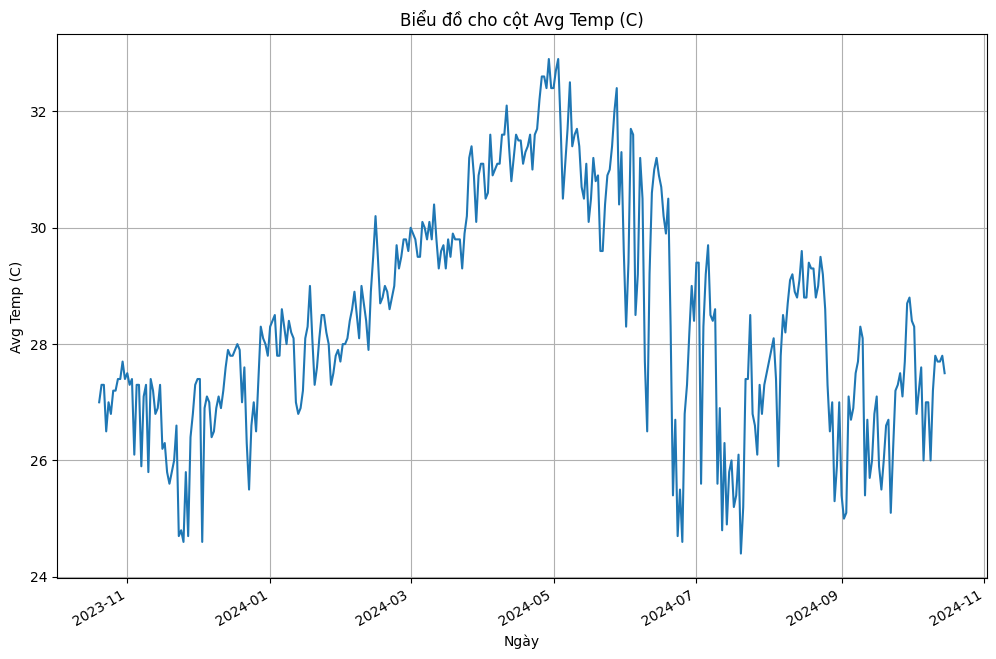

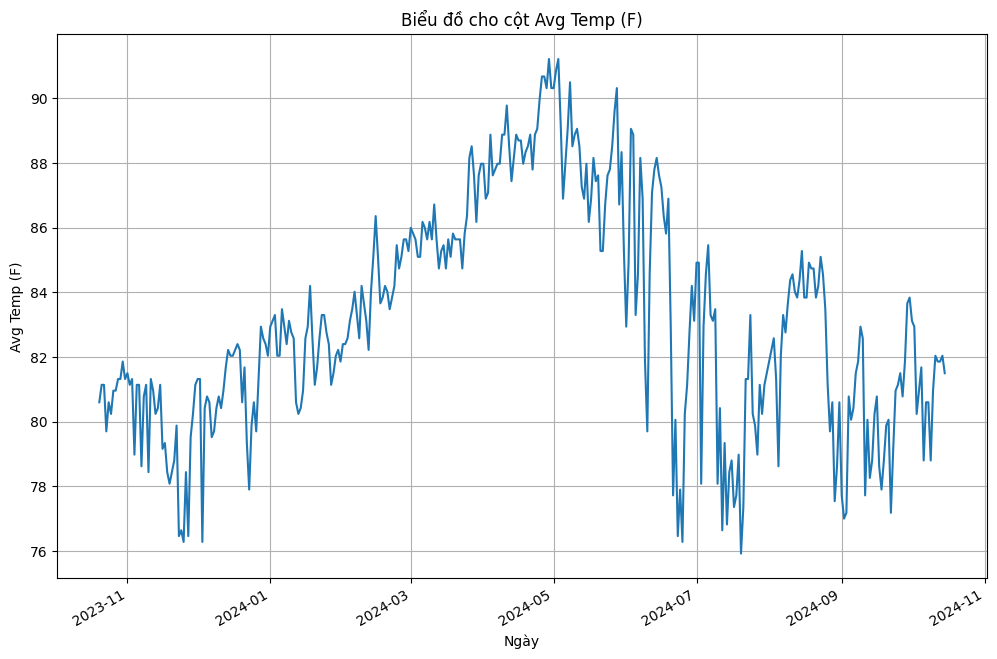

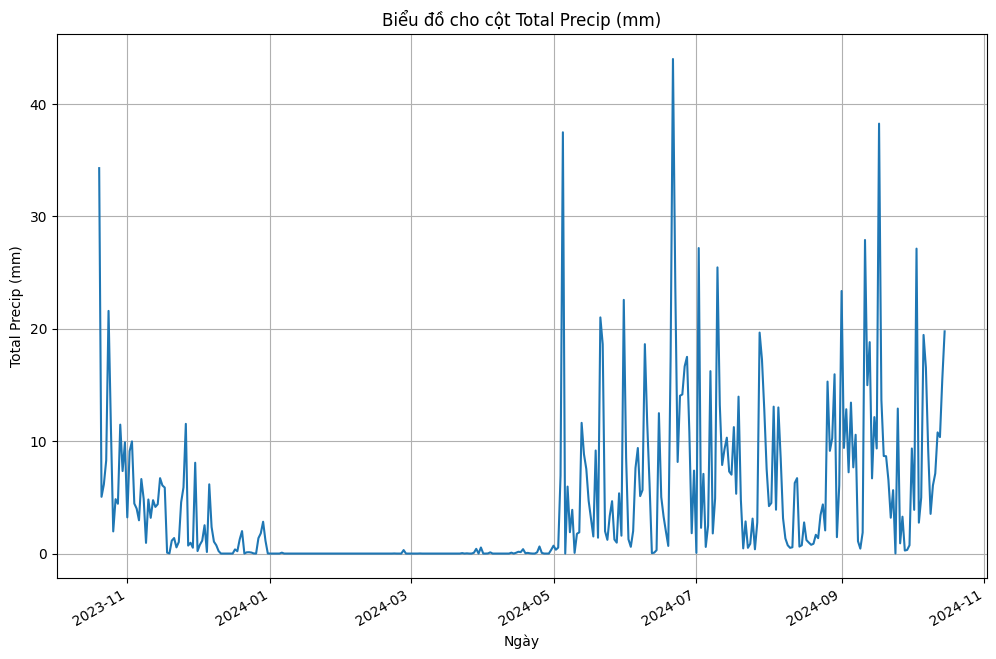

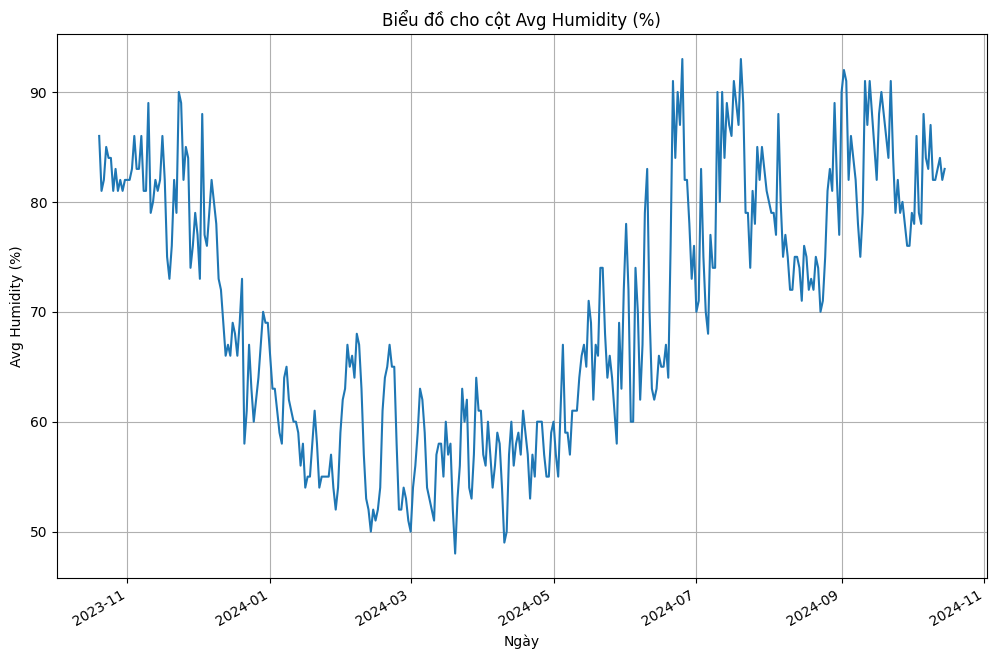

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])  # Chuyển đổi cột Date thành kiểu datetime
    df.set_index('Date', inplace=True)
# Danh sách các cột để vẽ biểu đồ
columns_to_plot = ['Avg Temp (C)', 'Avg Temp (F)', 'Total Precip (mm)', 'Avg Humidity (%)']

# Lặp qua các cột và vẽ biểu đồ
for column in columns_to_plot:
    plt.figure(figsize=(12, 8))  # Chỉnh kích thước biểu đồ
    df[column].plot(kind='line')
    plt.title(f'Biểu đồ cho cột {column}')
    plt.xlabel('Ngày' if 'Date' in df.index.name else 'Index')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


C:\Users\TanPhat\AppData\Local\Temp\ipykernel_20848\1446203985.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = df['Avg Temp (C)'].resample('M').mean()
C:\Users\TanPhat\AppData\Local\Temp\ipykernel_20848\1446203985.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_humidity = df['Avg Humidity (%)'].resample('M').mean()
C:\Users\TanPhat\AppData\Local\Temp\ipykernel_20848\1446203985.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_precipitation = df['Total Precip (mm)'].resample('M').mean()


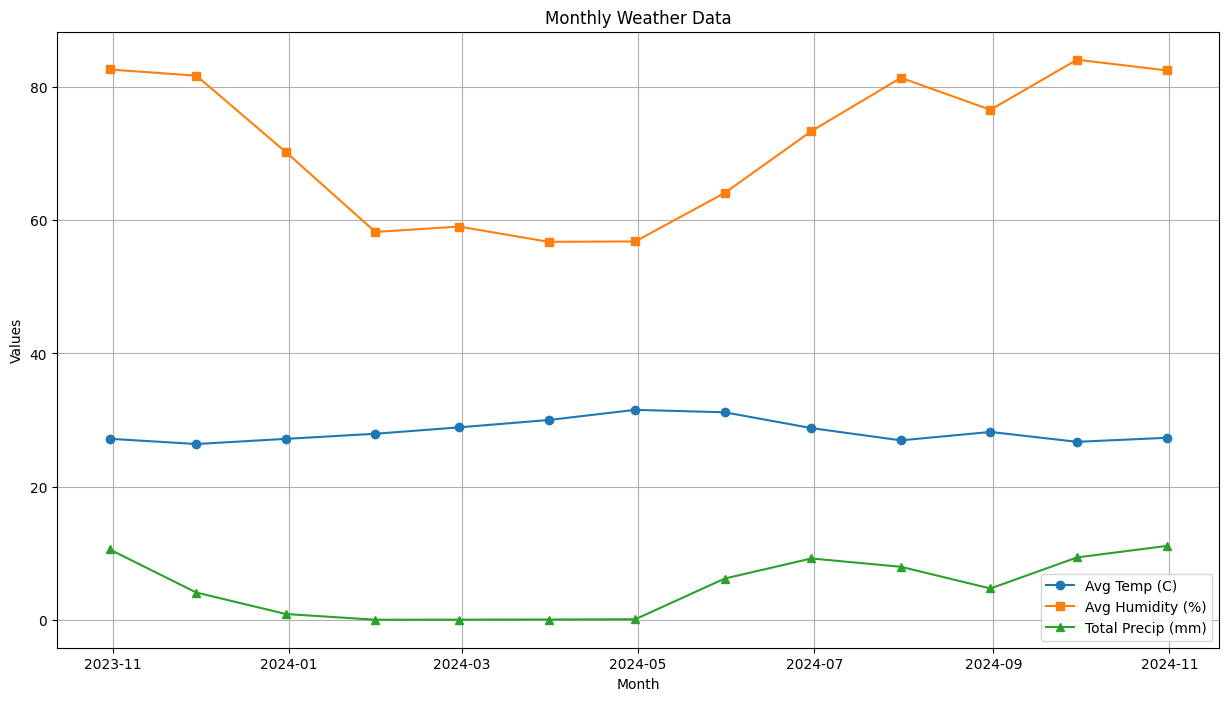

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Tính toán các giá trị trung bình hàng tháng
monthly_avg_temp = df['Avg Temp (C)'].resample('M').mean()
monthly_avg_humidity = df['Avg Humidity (%)'].resample('M').mean()
monthly_precipitation = df['Total Precip (mm)'].resample('M').mean()

# Tạo một DataFrame mới chứa các giá trị trung bình hàng tháng
monthly_data = pd.DataFrame({
    'Avg Temp (C)': monthly_avg_temp,
    'Avg Humidity (%)': monthly_avg_humidity,
    'Total Precip (mm)': monthly_precipitation
})

# Vẽ biểu đồ kết hợp
plt.figure(figsize=(15, 8))
plt.plot(monthly_data.index, monthly_data['Avg Temp (C)'], label='Avg Temp (C)', marker='o')
plt.plot(monthly_data.index, monthly_data['Avg Humidity (%)'], label='Avg Humidity (%)', marker='s')
plt.plot(monthly_data.index, monthly_data['Total Precip (mm)'], label='Total Precip (mm)', marker='^')
plt.title('Monthly Weather Data')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
